In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_roc_curve, accuracy_score

pd.set_option('display.max_columns', None) 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

%matplotlib inline
import matplotlib.pyplot as plt

from utils import XyScaler
from roc_curve2 import roc_curve

In [4]:
checker = pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/train_4_model.csv')

In [5]:
df_withID = pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/ready12_24_train.csv')

In [6]:
from preprocessing import drop_cols , one_hot_encoding , scale
data = drop_cols(df_withID) # drop cols

df_encode = one_hot_encoding(data, columns = ['City_Type','Category1_x','Category2','Category3','Job_Type', 'online_score'])
df_encode1 = df_encode.drop(['City_Type','Category1_x','Category2','Category3','Job_Type','online_score'],axis=1) 
df_encode2 = df_encode.drop(['City_Type','Category1_x','Category2','Category3','Job_Type','online_score'],axis=1) 
df_encode3 = df_encode.drop(['City_Type','Category1_x','Category2','Category3','Job_Type','online_score'],axis=1) 
df_encode4 = df_encode.drop(['City_Type','Category1_x','Category2','Category3','Job_Type','online_score'],axis=1) 


In [9]:
df_encode1 =df_encode1.head(3)

In [10]:
df_encode1.to_csv('hot_encode_fordisplay.csv', index=False)

In [7]:
df_withID.head()

,Patient_ID_x,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Category1_x,Category2,Category3,Camp_Start_Date2,Camp_End_Date2,patient_event,Unnamed: 0_x,Unnamed: 0.1_x,Online_Follower_x,First_Interaction,City_Type,Employer_Category,Job_Type,Event1_or_2_x,online_score,Category1_y,Unnamed: 0_y,Unnamed: 0.1_y,Patient_ID_y,Online_Follower_y,Event1_or_2_y,y_target,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_length,delta_first_reg,interaction_regreister_delta,delta_first_start,delta_reg_end,Camp_Length
0,489652,6578,2005-09-10,4.0,0.0,0.0,0.0,2.0,Third,G,2100,2005-08-16,2005-10-14,4896526578,6898,6898,0,2004-12-06,23384,NaN,9999.0,1,0,Third,6898.0,6898.0,489652.0,0.0,1.0,1.0,NaN,2.0,1.0,59 days,-25.0,278,253,34,59
1,489652,6532,2005-03-15,0.0,0.0,0.0,0.0,0.0,First,F,2100,2005-02-19,2005-08-23,4896526532,6898,6898,0,2004-12-06,23384,NaN,9999.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-24.0,99,75,161,185
2,489652,6543,2005-11-26,4.0,0.0,0.0,0.0,2.0,First,F,2100,2005-09-27,2007-11-07,4896526543,6898,6898,0,2004-12-06,23384,NaN,9999.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-60.0,355,295,711,771
3,489652,6580,2004-12-18,0.0,0.0,0.0,0.0,0.0,First,E,2100,2004-12-22,2005-01-06,4896526580,6898,6898,0,2004-12-06,23384,NaN,9999.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4.0,12,16,19,15
4,489652,6570,2005-05-01,0.0,0.0,0.0,0.0,0.0,First,E,2100,2005-07-09,2005-07-22,4896526570,6898,6898,0,2004-12-06,23384,NaN,9999.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,69.0,146,215,82,13


In [8]:
checker["Camp Start Date - Registration Date"] = checker['delta_first_reg']
checker[ "Registration Date - First Interaction"] = checker['interaction_regreister_delta']
checker["Camp Start Date - First Interaction"]=checker['delta_first_start']
checker["Camp End Date - Registration Date"]=checker['delta_reg_end']
checker['Camp Length'] = checker['Camp_Length']

In [9]:
too_drop=['delta_first_reg',
       'interaction_regreister_delta', 'delta_first_start', 'delta_reg_end',
       'Camp_Length']
checker = checker.drop(too_drop,axis=1)

In [10]:
plt.rcParams['figure.dpi'] = 200

In [11]:
from numpy import argmax 

In [12]:
import seaborn as sns
'''
 6   delta_first_reg               75278 non-null  float64
 7   interaction_regreister_delta  75278 non-null  float64
 8   delta_first_start             75278 non-null  float64
 9   delta_reg_end                 75278 non-null  float64

'''

'\n 6   delta_first_reg               75278 non-null  float64\n 7   interaction_regreister_delta  75278 non-null  float64\n 8   delta_first_start             75278 non-null  float64\n 9   delta_reg_end                 75278 non-null  float64\n\n'

<AxesSubplot:>

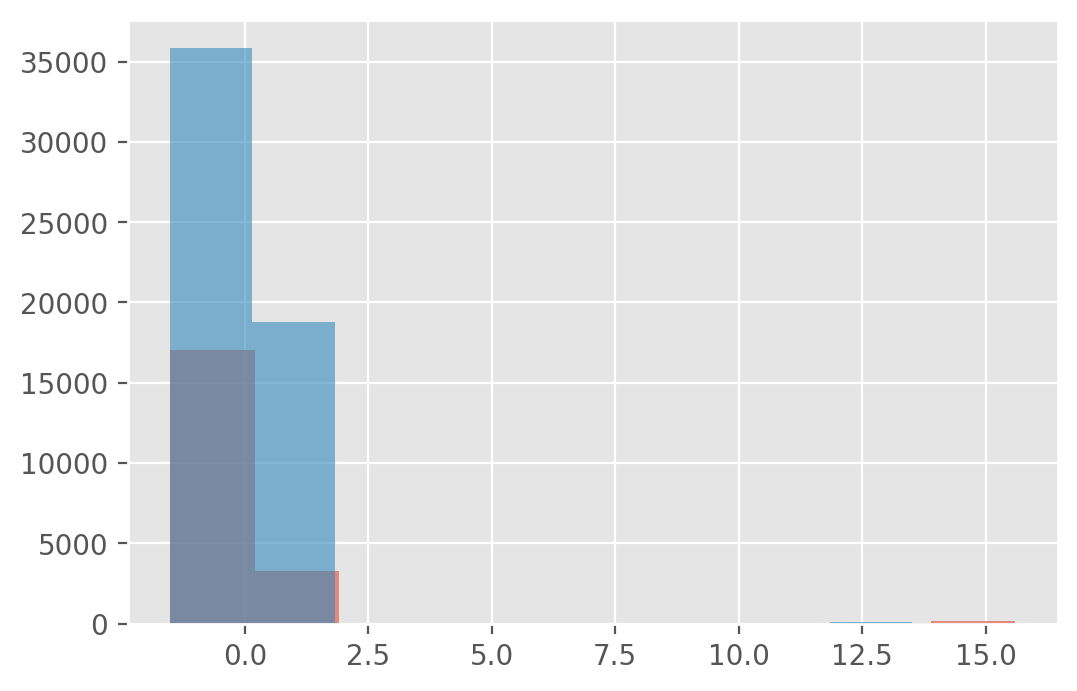

In [13]:
# make hist 
checker[checker['y_target'] ==1]["Camp Start Date - Registration Date"].hist(alpha=.6)
checker[checker['y_target'] ==0]["Camp Start Date - Registration Date"].hist(alpha=.6)


In [49]:
results_by_camp1 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/data_by_feature/results_by_Camp_t1.csv')
results_by_camp2 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/data_by_feature/results_by_Camp_t2.csv')
results_by_camp3 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/data_by_feature/results_by_Camp_t3.csv')
results_by_camp4 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/data_by_feature/results_by_Camp_t4.csv')

In [51]:
results_by_city1 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/data_by_feature/results_by_CITY_t1.csv')
results_by_city2 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/data_by_feature/results_by_CITY_t2.csv')
results_by_city3 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/data_by_feature/results_by_CITY_t3.csv')
results_by_city4 = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/data_by_feature/results_by_CITY_t4.csv')

In [52]:
results_by_city1['Ratio'] = results_by_city1['False Negative']/results_by_city1['False Positive']
results_by_city2['Ratio'] = results_by_city2['False Negative']/results_by_city2['False Positive']
results_by_city3['Ratio'] = results_by_city3['False Negative']/results_by_city3['False Positive']
results_by_city4['Ratio'] = results_by_city4['False Negative']/results_by_city4['False Positive']

In [53]:
results_by_camp1['Ratio'] = results_by_camp1['False Negative']/results_by_camp1['False Positive']
results_by_camp2['Ratio'] = results_by_camp2['False Negative']/results_by_camp2['False Positive']
results_by_camp3['Ratio'] = results_by_camp3['False Negative']/results_by_camp3['False Positive']
results_by_camp4['Ratio'] = results_by_camp4['False Negative']/results_by_camp4['False Positive']

In [59]:
results_by_camp3

,Health_Camp_ID,False Positive,False Negative,Y Count,Test Size,Ratio
0,6578,128,313,362,568,2.445312
1,6532,1,2,52,399,2.000000
2,6543,5,2,158,1309,0.400000
3,6580,1,1,56,704,1.000000
4,6570,2,0,63,713,0.000000
5,6542,5,2,80,474,0.400000
6,6571,0,1,41,418,inf
7,6527,115,380,522,829,3.304348
8,6526,0,0,32,762,NaN
9,6539,2,1,48,399,0.500000


Formally:
Each camp_ID is unique
Each Location is unique BUT will have multiple unique camp_IDs at each spot

Camp_set = {6528, 6529, 6530, 6531, 6532, 6534, 6535, 6536, 6537, 6538, 6539, 6540, 6541, 6542, 6543, 6544, 6546, 6549, 6552, 6553, 6554, 6555, 6557, 6558, 6560, 6561, 6562, 6563, 6564, 6565, 6569, 6570, 6571, 6575, 6578, 6580, 6581, 6585, 6586, 6587, 6523, 6524, 6526, 6527}

Each Camp_type is unique BUT will have multiple camp_IDs, multiple locations

In [46]:
results_by_city1

,Health_Camp_ID,False Positive,False Negative,Y Count,Test Size,Ratio
0,6587,1119,1155,1412,6642,1.032172
1,6587,111,194,296,852,1.747748
2,6587,85,150,236,663,1.764706
3,6587,168,251,347,1091,1.494048
4,6587,240,353,506,1655,1.470833
5,6586,102,154,211,689,1.509804
6,6587,106,173,267,805,1.632075
7,6586,124,212,299,872,1.709677
8,6587,195,302,409,1228,1.548718
9,6587,87,136,178,562,1.563218


In [56]:
1119 + 1155 + 1412 - 6642

-2956

In [47]:
results_by_city2

,Health_Camp_ID,False Positive,False Negative,Y Count,Test Size,Ratio
0,6587,677,912,1412,6642,1.347120
1,6587,74,167,296,852,2.256757
2,6587,52,130,236,663,2.500000
3,6587,105,212,347,1091,2.019048
4,6587,151,293,506,1655,1.940397
5,6586,66,141,211,689,2.136364
6,6587,76,161,267,805,2.118421
7,6586,80,181,299,872,2.262500
8,6587,119,225,409,1228,1.890756
9,6587,57,110,178,562,1.929825


In [48]:
results_by_city3

,Health_Camp_ID,False Positive,False Negative,Y Count,Test Size,Ratio
0,6587,178,345,1412,6642,1.938202
1,6587,52,141,296,852,2.711538
2,6587,38,110,236,663,2.894737
3,6587,87,181,347,1091,2.080460
4,6587,133,279,506,1655,2.097744
5,6586,54,130,211,689,2.407407
6,6587,61,137,267,805,2.245902
7,6586,56,160,299,872,2.857143
8,6587,98,211,409,1228,2.153061
9,6587,46,102,178,562,2.217391


In [ ]:
 [[5201   29] TN/FN
 [1317   95]] TP/FP
    
[[4111 1119]  TN/FN
 [ 257 1155]] TP/FP


In [60]:
results_by_city3['Actual Attendnce'] =  results_by_city3['Y Count'] / results_by_city3['Test Size']

In [61]:
results_by_city3

,Health_Camp_ID,False Positive,False Negative,Y Count,Test Size,Ratio,Actual Attendnce
0,6587,178,345,1412,6642,1.938202,0.212587
1,6587,52,141,296,852,2.711538,0.347418
2,6587,38,110,236,663,2.894737,0.355958
3,6587,87,181,347,1091,2.080460,0.318057
4,6587,133,279,506,1655,2.097744,0.305740
5,6586,54,130,211,689,2.407407,0.306241
6,6587,61,137,267,805,2.245902,0.331677
7,6586,56,160,299,872,2.857143,0.342890
8,6587,98,211,409,1228,2.153061,0.333062
9,6587,46,102,178,562,2.217391,0.316726


In [23]:
results_by_city2.Ratio.values

array([       nan, 2.24675325, 2.55769231, 1.93269231, 1.89032258,
       1.7875    , 2.16      , 1.80701754, 1.64968153, 2.        ])

In [17]:
checkerxx = checker.copy()

In [18]:
checker.columns 

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'y_target', 'Second', 'Third',
       '1036', '1216', '1217', '1352', '1704', '1729', '2517', '2662', '23384',
       'B', 'C', 'D', 'E', 'F', 'G', '2100', '2.0', '3.0', '4.0', '5.0', '6.0',
       '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '9999.0',
       '1', '2', '3', '4', 'Camp Start Date - Registration Date',
       'Registration Date - First Interaction',
       'Camp Start Date - First Interaction',
       'Camp End Date - Registration Date', 'Camp Length'],
      dtype='object')

In [19]:
checker = checker.copy()
# checker = checker.drop(['Var4','11.0', '12.0', '13.0', '14.0','1217', '1352',
#        '1704', '1729', '2517', '2662','7.0','4.0','6.0','3.0'],axis=1)
checker1 = checker.copy() 

checker3 = checker.copy() 
checker4 = checker.copy() 
checker5 = checker.copy() 
checker7 = checker.copy()  
checker8 = checker.copy() 
checker9 = checker.copy() 
checker10 = checker.copy() 
checker11 = checker.copy()  

# checker_base = checker.copy() 
# trump= [ 'delta_first_reg',
#        'interaction_regreister_delta', 'delta_first_start', 'delta_reg_end',
#        'Camp_Length', 'Second', 'Third', '1036', '1216', '23384', 'B', 'C',
#        'D', 'E', 'F', 'G', '2100', '2.0', '5.0', '8.0', '9.0', '10.0',
#        '9999.0', '1', '2', '3', '4']
# checker_base   = checker.drop(trump, axis=1)
# cb1 = checker_base.copy() 
# cb2 = checker_base.copy()
# cb3 = checker_base.copy() 
# cb4 = checker_base.copy() 
# cb5 = checker_base.copy()  
# cb7 = checker_base.copy()  
# cb9 = checker_base.copy()  
# cb10 = checker_base.copy()  
# cb11 = checker_base.copy()  
# cb12 = checker_base.copy()  
# cb20 = checker_base.copy()  

In [20]:
y_to_test = checker11['y_target']


In [21]:
ynotx = y_to_test 
train_test_split(ynotx, shuffle=False) 
X_train,X_test,y_train,y_test = train_test_split(
    checker11,ynotx,test_size = .2, random_state=101)

print(X_train, X_test, y_train,y_test)

from sklearn.linear_model import LogisticRegression
logmodelx = LogisticRegression(penalty='l2', dual=False, tol=1e-4, C=1.0, 
        fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, 
        solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, 
        n_jobs=1, l1_ratio=None ) 
logmodelx.fit(X_train, y_train)

           Var1      Var2      Var3     Var4      Var5  y_target  Second  \
45918 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0       0   
20421 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0       0   
74357 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0       0   
67955 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0       0   
5630  -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0       0   
...         ...       ...       ...      ...       ...       ...     ...   
55293 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       1.0       1   
49751 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0       0   
5695  -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       1.0       0   
73542 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0       0   
45919 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0       0   

       Third  1036  1216  1217  1352  1704  1729  2517  2662  23384  B  C  D  \
45918  

LogisticRegression(n_jobs=1)

In [22]:
pure_probx= logmodelx.predict_proba(X_test)[:,1]
predx = logmodelx.predict(X_test)

In [23]:
g = [ X_train, X_test, y_train,y_test,predx,pure_probx]
for i in g:
    print(len(i))
Xs = X_train - X_test 

60222
15056
60222
15056
15056
15056


In [24]:
'''
A. Take X_train - X_test that creates == TO_check <56458-18820> = 37639
B. Add the column from [logmodelx.predict_proba(X_test)[:,1]] to Take TO_check

def get_specifics(X_train, y_train,predx ):



'''

'\nA. Take X_train - X_test that creates == TO_check <56458-18820> = 37639\nB. Add the column from [logmodelx.predict_proba(X_test)[:,1]] to Take TO_check\n\ndef get_specifics(X_train, y_train,predx ):\n\n\n\n'

In [25]:
predsx, preds2x = predx >= .45 ,predx >= .55
for name, coef in zip(predsx[1:], logmodelx.coef_[0]):
    print("{0}: {1:0.4f}".format(name, coef))

False: 0.0051
False: -0.0154
False: -0.0020
False: -0.0048
False: 0.0661
False: 14.6526
False: 0.4865
False: 0.4220
False: 0.0060
True: 0.0319
True: 0.0088
False: 0.0251
False: 0.0026
False: 0.0094
True: 0.0642
False: -0.0296
True: -0.1827
True: -0.1865
True: 0.1888
False: 0.1923
False: -0.4220
True: -0.4906
True: 0.4220
True: -0.0840
False: 0.0195
False: 0.0561
False: 0.0313
False: 0.0349
False: 0.0083
False: -0.0148
False: -0.0045
False: -0.0123
False: 0.0130
False: -0.0124
False: -0.0159
False: -0.0107
False: 0.0109
False: -0.1362
False: 0.0814
False: 0.1181
False: 0.0494
False: 0.0512
False: -0.0030
False: 0.0146
False: 0.0158
False: 0.0770
False: 0.0942


In [26]:
print(len(predsx), len(X_train), len(X_test))
X_train_len = len(X_train)
X_test_len = len(X_test)
print(X_train_len - X_test_len)

15056 60222 15056
45166


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds2x) ) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10904
         1.0       1.00      1.00      1.00      4152

    accuracy                           1.00     15056
   macro avg       1.00      1.00      1.00     15056
weighted avg       1.00      1.00      1.00     15056



In [28]:
print(confusion_matrix(y_test,preds2x)) 

[[10904     0]
 [    0  4152]]


In [29]:
print(classification_report(y_test,predsx) ) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10904
         1.0       1.00      1.00      1.00      4152

    accuracy                           1.00     15056
   macro avg       1.00      1.00      1.00     15056
weighted avg       1.00      1.00      1.00     15056



In [30]:
to_try = confusion_matrix(y_test,predsx)
print(to_try) 

[[10904     0]
 [    0  4152]]


In [31]:
(.7+ .36) / (.8 * .94)

1.4095744680851066

In [32]:
checker1.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'y_target', 'Second', 'Third',
       '1036', '1216', '1217', '1352', '1704', '1729', '2517', '2662', '23384',
       'B', 'C', 'D', 'E', 'F', 'G', '2100', '2.0', '3.0', '4.0', '5.0', '6.0',
       '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '9999.0',
       '1', '2', '3', '4', 'Camp Start Date - Registration Date',
       'Registration Date - First Interaction',
       'Camp Start Date - First Interaction',
       'Camp End Date - Registration Date', 'Camp Length'],
      dtype='object')

In [33]:
ynot1 = checker1.pop('y_target')
 

train_test_split(ynot1, shuffle=False) 
X_train,X_test,y_train,y_test = train_test_split(
    checker1,ynot1,test_size = .2, random_state=101)

In [34]:
from sklearn.linear_model import LogisticRegression
weights = {0:1.0, 1:10.0}
logmodel = LogisticRegression(penalty='l2', dual=False, tol=1e-4, C=1.0, 
        fit_intercept=True, intercept_scaling=1, class_weight=weights, random_state=None, 
        solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, 
        n_jobs=-1, l1_ratio=None ) 
logmodel.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.0, 1: 10.0}, n_jobs=-1)

In [35]:
pure_probaz = logmodel.predict_proba(X_test)[:,1]
predictionsz = logmodel.predict(X_test)

In [36]:
pure_probaz  
#predictionsz

array([0.51957187, 0.53670864, 0.65616247, ..., 0.82290658, 0.92017436,
       0.88452725])

In [37]:
roc_auc_logmodel = roc_auc_score(y_test, logmodel.fit(X_train, y_train).predict_proba(X_test)[:, -1]) 
print(roc_auc_logmodel)

0.8059931560707778


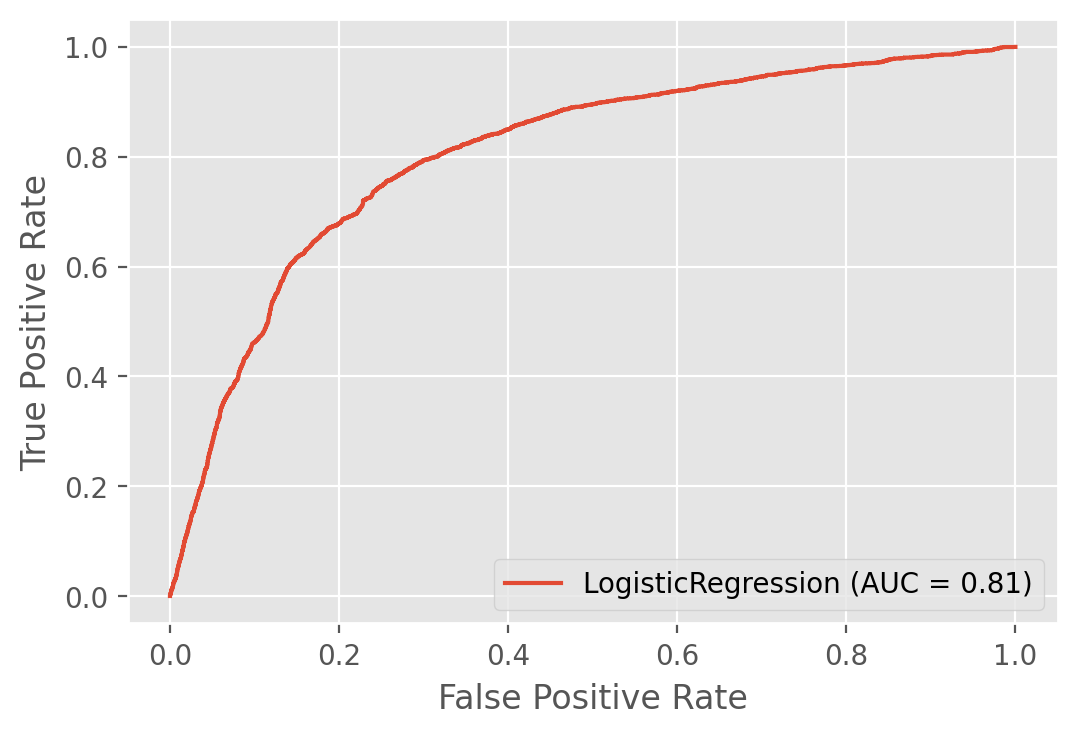

In [38]:
logmodel_disp = plot_roc_curve(logmodel, X_test, y_test)
plt.show()

In [39]:
predsz, preds2z = pure_probaz >= .35 ,pure_probaz >= .5
# for name, coef in zip(preds2z[1:], logmodel.coef_[0]):
#     print("{0}: {1:0.4f}".format(name, coef))

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds2z) ) 

              precision    recall  f1-score   support

         0.0       0.93      0.37      0.53     10904
         1.0       0.36      0.93      0.52      4152

    accuracy                           0.52     15056
   macro avg       0.64      0.65      0.52     15056
weighted avg       0.77      0.52      0.52     15056



In [41]:
print(classification_report(y_test,predsz) )

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     10904
         1.0       0.28      1.00      0.43      4152

    accuracy                           0.28     15056
   macro avg       0.14      0.50      0.22     15056
weighted avg       0.08      0.28      0.12     15056



/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
print(confusion_matrix(y_test,preds2z))  

[[4003 6901]
 [ 295 3857]]


In [43]:
print(confusion_matrix(y_test,predsz)) 

[[    0 10904]
 [    0  4152]]


In [44]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence


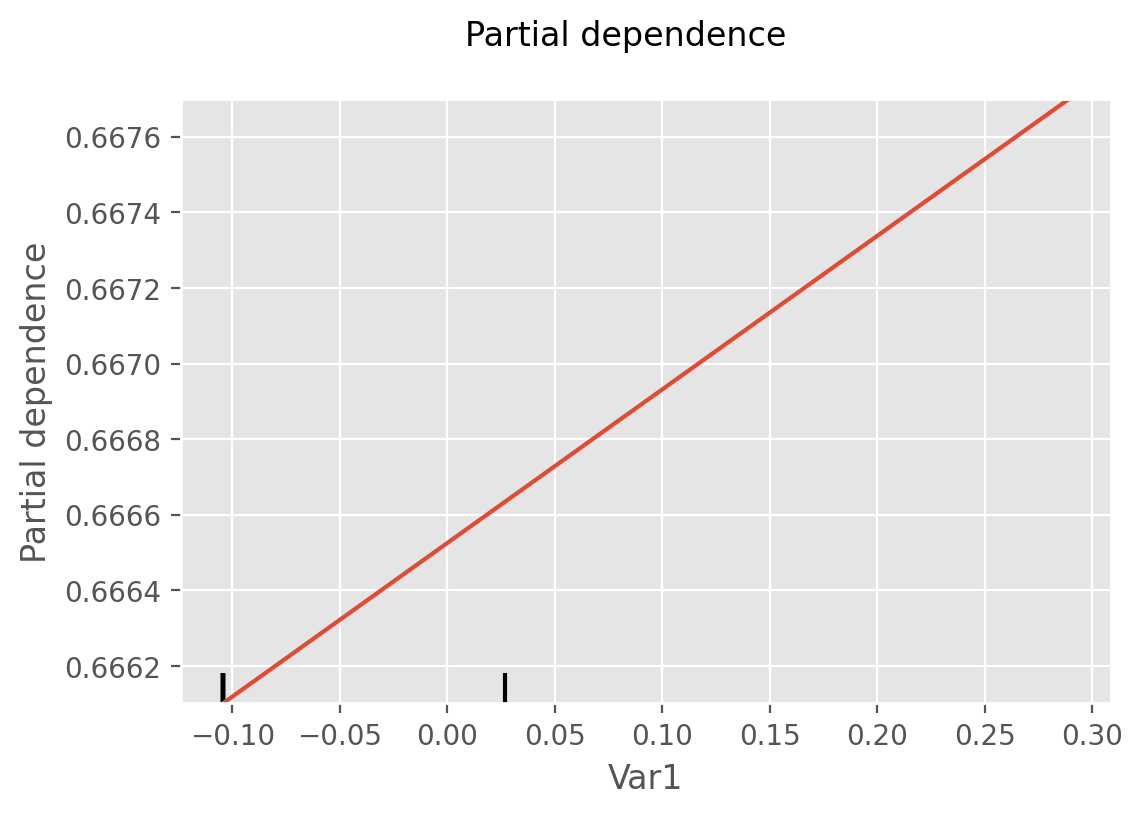

In [45]:
features = ['Var1'] 
'''#, 
, 'delta_first_reg',
       'interaction_regreister_delta', 'delta_first_start', 'delta_reg_end',
       'Camp_Length', 'Second', 'Third', '1036', '1216', '1217', '1352',
       '1704', '1729', '2517', '2662', '23384', 'B', 'C', 'D', 'E', 'F', 'G',
       '2100', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0',
       '11.0', '12.0', '13.0', '14.0', '9999.0', '1', '2', '3', '4'
'''

display = plot_partial_dependence(logmodel, X_train, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)

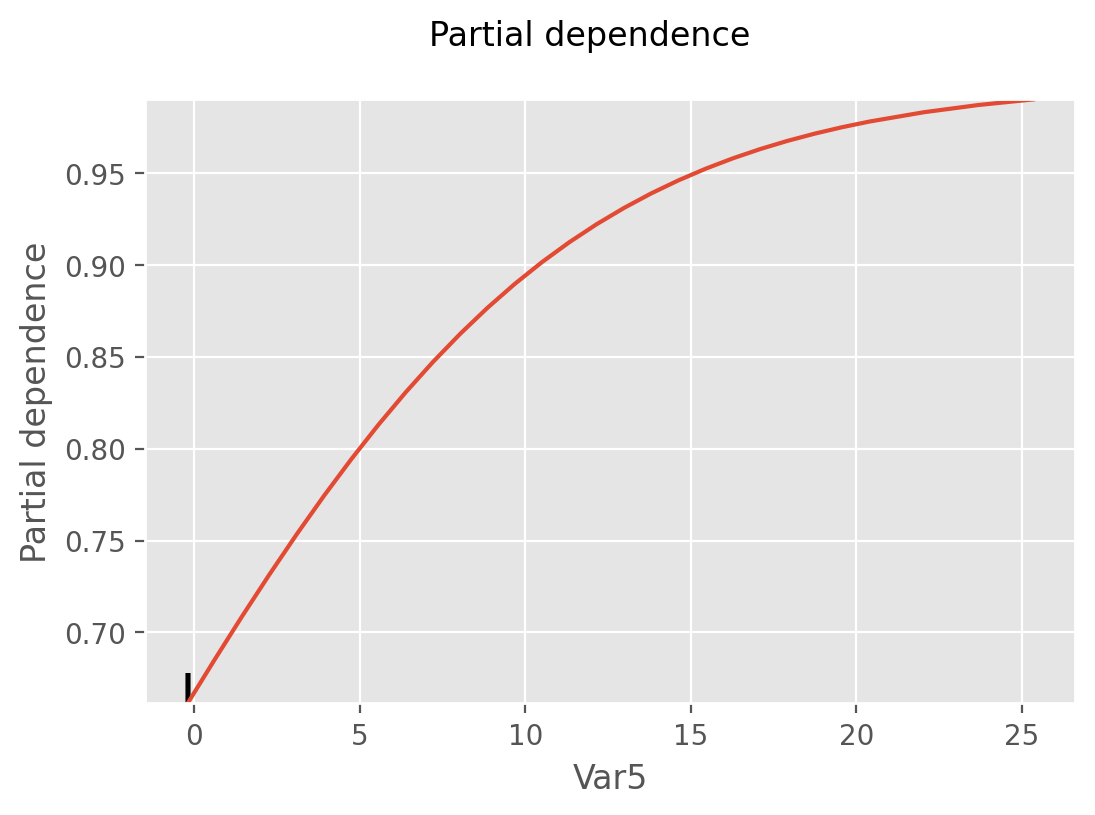

In [46]:
features = ['Var5' ] 
'''#, 
, 'delta_first_reg',
       'interaction_regreister_delta', 'delta_first_start', 'delta_reg_end',
       'Camp_Length', 'Second', 'Third', '1036', '1216', '1217', '1352',
       '1704', '1729', '2517', '2662', '23384', 'B', 'C', 'D', 'E', 'F', 'G',
       '2100', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0',
       '11.0', '12.0', '13.0', '14.0', '9999.0', '1', '2', '3', '4'
'''

display = plot_partial_dependence(logmodel, X_train, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)

In [47]:
this will break 

SyntaxError: invalid syntax (<ipython-input-47-54c2f6e7e9f4>, line 1)

In [ ]:
features = ['Camp Start Date - Registration Date'] 

'''#, 'Var3', 'Var4', 'Var5'
, , 'delta_first_start', 'delta_reg_end',
       'Camp_Length', 'Second', 'Third', '1036', '1216', '1217', '1352',
       '1704', '1729', '2517', '2662', '23384', 'B', 'C', 'D', 'E', 'F', 'G',
       '2100', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0',
       '11.0', '12.0', '13.0', '14.0', '9999.0', '1', '2', '3', '4'
'''

display = plot_partial_dependence(logmodel, X_test, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)

In [ ]:
features = [
       'Registration Date - First Interaction',
     ] 
display = plot_partial_dependence(logmodel, X_test, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)


In [ ]:
features = [
        'Camp Start Date - First Interaction',
     ] 
display = plot_partial_dependence(logmodel, X_test, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)

In [ ]:
features = [
        'Camp End Date - Registration Date',
     ] 
display = plot_partial_dependence(logmodel, X_test, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)

In [ ]:
features = [
       'Camp Length',
     ] 
display = plot_partial_dependence(logmodel, X_test, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)

In [ ]:
y1 = checker10.pop('y_target') 

In [ ]:
kfold = KFold(n_splits=5)

accuracies = []
precisions = []
recalls = []

X_train, X_test, y_train, y_test = train_test_split(checker10, y1)

for train_index, test_index in kfold.split(X_train):
    model = LogisticRegression(solver="lbfgs")
    model.fit(X_train.iloc[train_index], y1.iloc[train_index])
    y_predict = model.predict(X_train.iloc[test_index])
    y_true = y1.iloc[test_index]
    accuracies.append(accuracy_score(y_true, y_predict))
    precisions.append(precision_score(y_true, y_predict))
    recalls.append(recall_score(y_true, y_predict))

print("Accuracy:", np.average(accuracies))
print("Precision:", np.average(precisions))
print("Recall:", np.average(recalls))

In [ ]:

#ynot1 = cb12.pop('y_target')

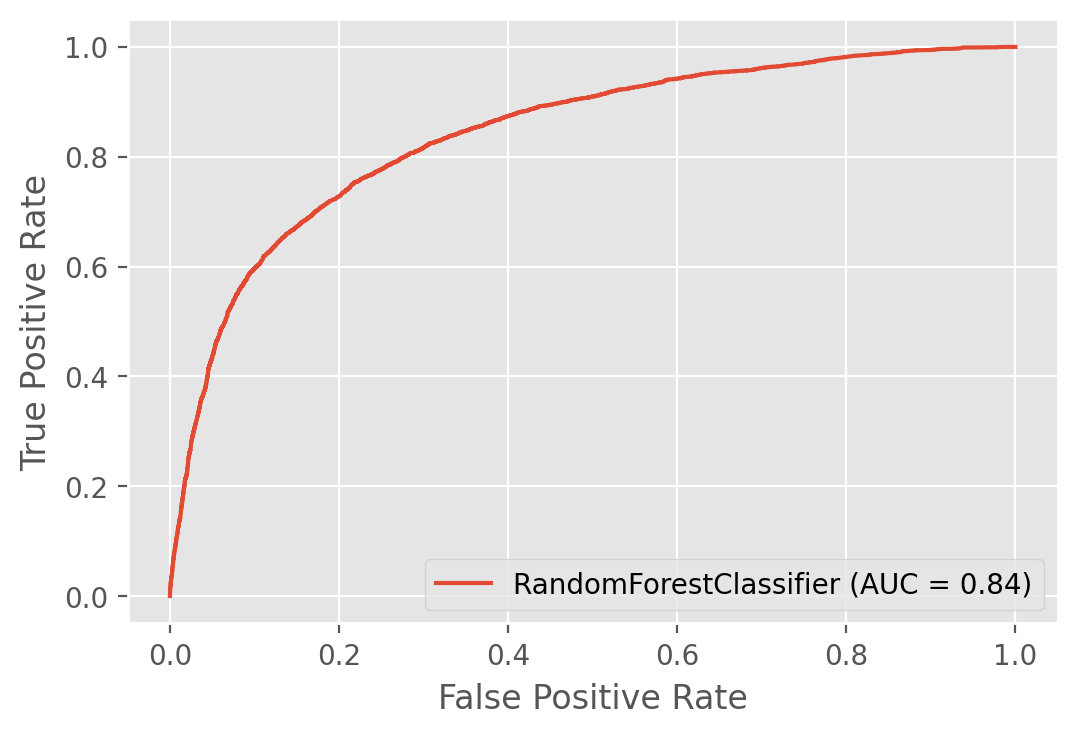

In [48]:
from sklearn.ensemble import RandomForestClassifier

y = df_encode1.pop('y_target')
X = df_encode1 

# y = cb7.pop('y_target')
# X = cb7

X_train7, X_test7, y_train7, y_test7 = train_test_split(X, y, random_state=42)

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 10)
rfc.fit(X_train7,y_train7)
rfc_preds = rfc.predict(X_test7)
roc_auc=roc_auc_score(y_test7, rfc.predict_proba(X_test7)[:, -1])
logmodel_disp = plot_roc_curve(rfc, X_test7, y_test7)
plt.show()


In [50]:
print(confusion_matrix(y_test7,rfc_preds)) 

[[12419  1166]
 [ 2274  2961]]


In [51]:
print(roc_auc)

0.8416977613448734


In [ ]:
#plot_partial_dependence(rfc, features=[5, 6, 7,8], feature_names=X_test7.columns, X=X_test7, grid_resolution=10)

In [ ]:
#plot_partial_dependence(rfc, features=[5, 6,  ], feature_names=X_test7.columns, X=X_test7, grid_resolution=10)

In [ ]:
#plot_partial_dependence(rfc, features=[ 7,8], feature_names=X_test7.columns, X=X_test7, grid_resolution=10)

In [ ]:
#plot_partial_dependence(rfc, features=[9,10], feature_names=X_test7.columns, X=X_test7, grid_resolution=10)

In [ ]:
16 print 

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88     13585
         1.0       0.72      0.56      0.63      5235

    accuracy                           0.82     18820
   macro avg       0.78      0.74      0.75     18820
weighted avg       0.81      0.82      0.81     18820

[[12430  1155]
 [ 2288  2947]]


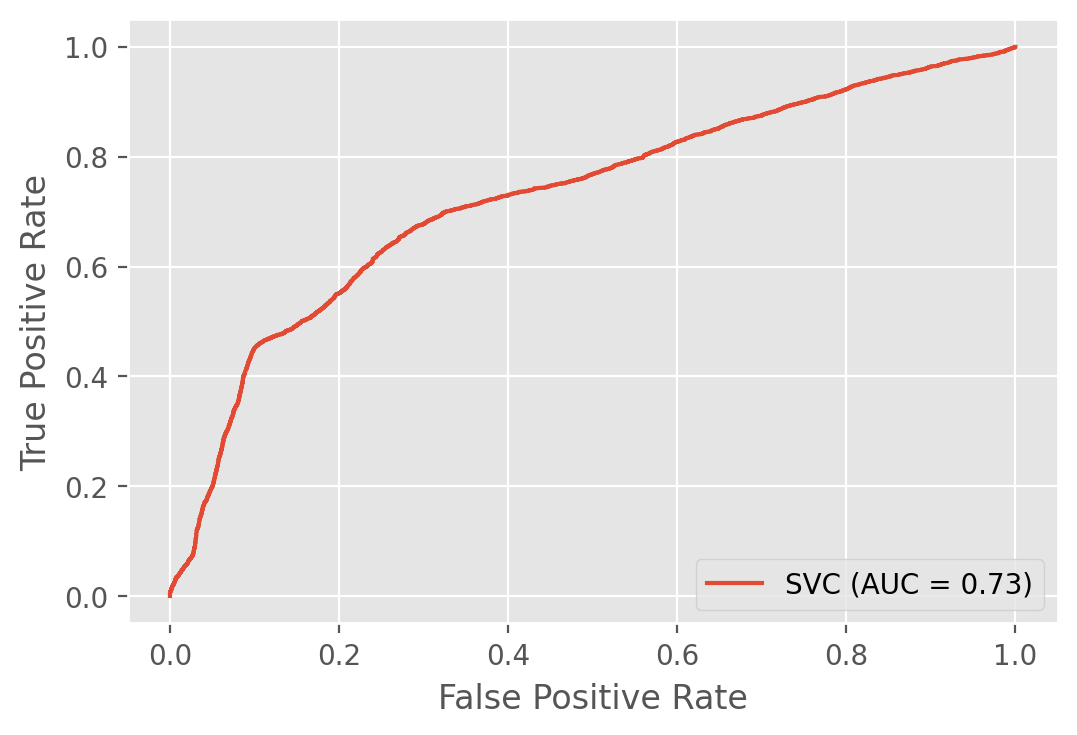

              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84     13585
         1.0       0.75      0.01      0.02      5235

    accuracy                           0.72     18820
   macro avg       0.74      0.50      0.43     18820
weighted avg       0.73      0.72      0.61     18820

[[13567    18]
 [ 5181    54]]


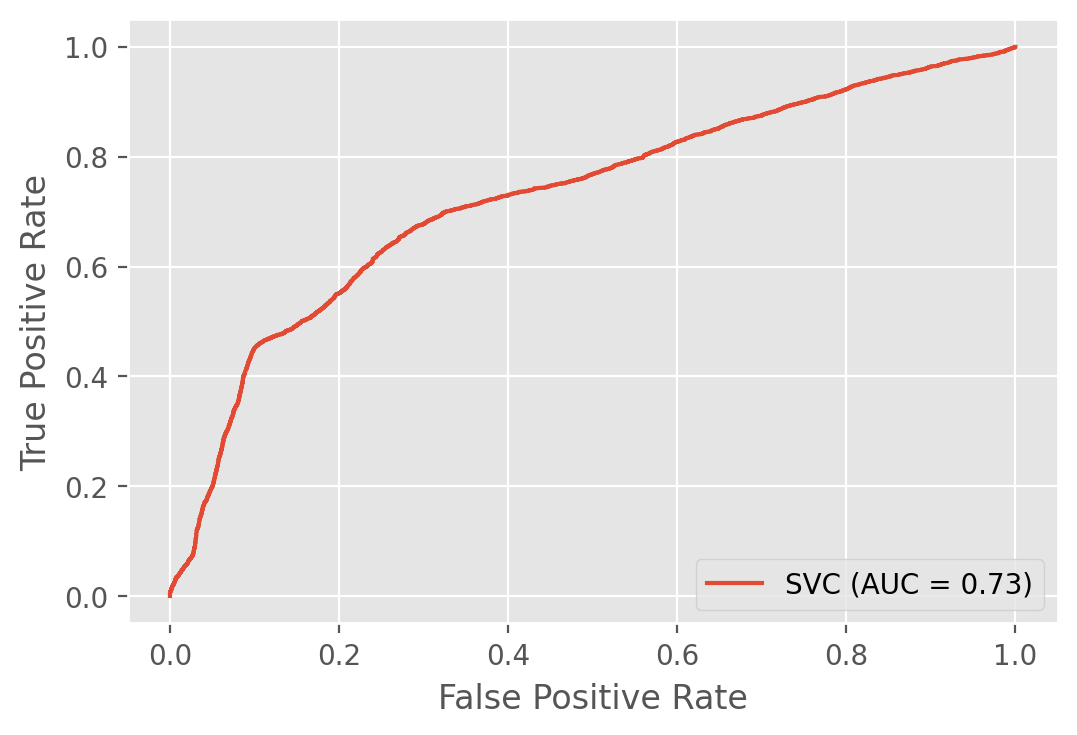

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve

# y = checker4.pop('y_target')
# X = checker4

# y = cb4.pop('y_target')
# X = cb4

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svc = SVC(random_state=42, probability = True)
svc.fit(X_test, y_test)

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 10)
rfc.fit(X_train,y_train)
rfc_preds = rfc.predict(X_test)


print(classification_report(y_test,rfc_preds) ) 
print(confusion_matrix(y_test,rfc_preds)) 

svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()
svc_preds = svc.predict(X_test)
svc_proba = svc.predict_proba(X_test)[:,1]

predsx , preds2x = svc_proba  >= .5 , svc_proba  >= .4

print(classification_report(y_test,svc_preds) )
print(confusion_matrix(y_test,svc_preds)) 
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()

In [ ]:
rfc.fit(X_train, y_train)
ax = plt.gca()
ax.set_title('ROC Curve')
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
logmodel_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [ ]:
y_trained_sum_of1 = [1 for x in y_train.values if x==1]
print(sum(y_trained_sum_of1), len(y_train.values))
y_test_sum_of1 = [1 for x in y_test.values if x==1]
print(sum(y_test_sum_of1),'y_test', len(y_test.values))

In [ ]:
# try and recombine data frame to examine outputs. 

In [ ]:
checker8.columns

In [ ]:
188543.2 - 117688


In [ ]:
checker7.info()

In [ ]:
20552/102000

In [ ]:
14711*20  * .2

In [ ]:
def cm_to_inch(value):
    return value/2.54

In [ ]:
importances = rfc.feature_importances_ [:5]
indices = np.argsort(importances)[::-1]
print(len(importances),len(indices))
print(importances,indices)

In [ ]:
col_names = X_test.columns 
importances = rfc.feature_importances_  
indices = np.argsort(importances)[::-1]
Random_Forest = 'Random Forest'
plt.bar(range(X_test.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(Random_Forest))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))

In [ ]:
print(sum(importances))

In [54]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

In [55]:
y9 = df_encode2.pop('y_target')
x9 = df_encode2

In [56]:
X_train9, X_test9, y_train9, y_test9 = train_test_split(x9, y9, test_size=0.2, random_state=101) 

In [57]:
train_dmatrix = xgb.DMatrix(data=X_train9,label=y_train9) 
test_dmatrix = xgb.DMatrix(data=X_test9,label=y_test9)

In [58]:
params = {"objective":'binary:logistic','colsample_bytree': 0.6,'learning_rate': 0.1,
       "min_child_weight": 5 ,'max_depth': 6, 'alpha': 10, 'eval_metric':'auc', 'subsample':0.8} 

cv_results = xgb.cv(dtrain=train_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=100, metrics='auc', as_pandas=True, seed=123)


In [59]:
#evallist = [(test_dmatrix, 'eval'), (train_dmatrix, 'train')] ,evallist,early_stopping_rounds=50
xgb_one = xgb.train(params,train_dmatrix )
# AssertionError: Must have at least 1 validation dataset for early stopping. 

In [60]:
ypred = xgb_one.predict(test_dmatrix, ntree_limit =xgb_one.best_ntree_limit )

AttributeError: 'Booster' object has no attribute 'fit'

In [62]:
col_names = X_test9.columns 
importances = xgb_one.feature_importances_  
indices = np.argsort(importances)[::-1]
Random_Forest = 'XGBClassifier'
plt.bar(range(X_test9.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(Random_Forest))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))

AttributeError: 'Booster' object has no attribute 'feature_importances_'

In [63]:
from xgboost import XGBRegressor
from pdpbox import pdp
 #,'interaction_regreister_delta', 
#            'delta_first_start', 'delta_reg_end',
#            'Camp_Length', 
my_model = XGBRegressor()
my_model.fit(X_train9, y_train9)
feature = ['Second', 'Third']
p = pdp.pdp_isolate(my_model, X_train9, X_train9.columns, feature)
pdp.pdp_plot(p, feature)

ValueError: feature_names must be unique

In [ ]:
print(ypred)
#print(confusion_matrix(y_test9,ypred  ))  

In [64]:
xg_reg1 = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 8, n_estimators = 12, eval_metric = 'auc', label_encoder=False)
xg_reg1.fit(X_train9,y_train9) 

[19:57:13] WARNING: ../src/learner.cc:541: 
Parameters: { label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(alpha=8, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', label_encoder=False,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=12, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=8, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

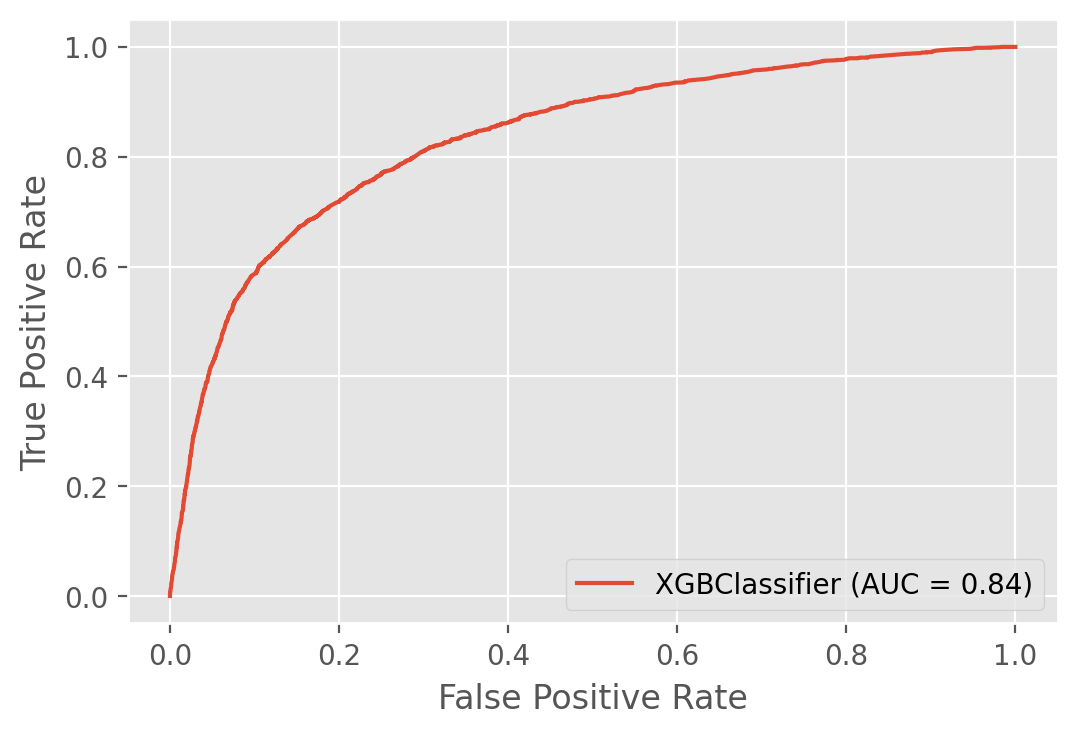

In [65]:
xg_reg1_predict = xg_reg1.predict(X_test9) 
xg_reg1_proba = xg_reg1.predict_proba(X_test9)[:,1]

preds_xg1_thresh1, preds2_xg1_thresh2 = xg_reg1_proba >=0.65 , xg_reg1_proba >=0.4

xg_reg1_disp = plot_roc_curve(xg_reg1 , X_test9, y_test9)
plt.show()




In [ ]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
ax.set_title('ROC Curve')
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
xg_reg1_disp2 = plot_roc_curve(xg_reg1, X_test9, y_test9, ax=ax, alpha=0.8) 
svc_disp.plot(ax=ax, alpha=0.8)
logmodel_disp.plot(ax=ax, alpha=0.8)

 
plt.show()

In [ ]:
print(classification_report(y_test9,preds_xg1_thresh1 ) )
print(classification_report(y_test9,preds2_xg1_thresh2 ) )

In [ ]:
print(confusion_matrix(y_test9,preds_xg1_thresh1))  
print(confusion_matrix(y_test9,preds2_xg1_thresh2))  

In [ ]:
[[6166 1409]
 [ 872 2092]]

[[6956  619]
 [1372 1592]]


In [ ]:
pint45 = 1409+2092
pint35 = 619+1592 
print(pint45,pint35)

In [ ]:

for i in ok:
    for ii in i :
        print(f'this is a thing from i -> {ii} being printed')
        
        

In [ ]:
ok=[[6633,  942],
 [1326, 1638]]

labels = ['Did Attend', 'Did NOT Attend'] # model Names
bottoms = [942,1326] # bottom part of column
tops = [ 1638 ,6633 ] # Top part of column

# men_std = [2, 3, 4, 1, 2] # currently not plotting std
# women_std = [3, 5, 2, 3, 3] # currently no plotting std

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels,bottoms, width, label='Incorrectly predicted')
ax.barh(labels, tops, width, bottom=bottoms,
       label='Correctly predicted')

ax.set_ylabel('Counts')
ax.set_title('Analysis of Model Test Results ')
ax.legend()

plt.show()


In [ ]:
# thought for above - should I plot 4 columns - one for each model -  showing the FP and FN split ? 

In [ ]:
ok=[[6633,  942],
 [1326, 1638]]

labels = ['Did Attend', 'Did NOT Attend'] # model Names
bottoms = [1326,942] # bottom part of column
tops = [ 6633,1638 ] # Top part of column

width = 0.15       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()


ax.bar(labels, bottoms,width,label='Incorrectly predicted')
ax.bar(labels, tops, width, label='Correctly predicted',bottom=tops,)

ax.set_ylabel('Counts')
ax.set_title('Analysis of Model Test Results ')
ax.legend()

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
xg_reg1 = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 8, n_estimators = 12, eval_metric = 'auc')

In [ ]:
xg_reg1.fit(X_train,y_train)

In [ ]:
tree1_predict = xg_reg1.predict(X_test) 
tree1_proba = xg_reg1.predict_proba(X_test)

In [ ]:

col_names = X_test.columns 
importances = xg_reg1.feature_importances_
indices = np.argsort(importances)[::-1]
title = 'XG Boost Classifier'
plt.bar(range(X_test.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(title))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))


In [ ]:
xg_reg1_disp = plot_roc_curve(xg_reg1, X_test, y_test)
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
logmodel_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [ ]:
params = {"objective":'binary:logistic','colsample_bytree': 0.6,'learning_rate': 0.1,
       "min_child_weight": 5 ,'max_depth': 6, 'alpha': 10, 'eval_metric':'auc', 'subsample':0.8} 

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=100, metrics='auc', as_pandas=True, seed=123)

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)

In [ ]:
uh = xgb_clf.predict(X_test) 
pred_proba = xgb_clf.predict_proba(X_test)

In [ ]:
probs = pred_proba[:,1] 

In [ ]:
col_names = X_test.columns 
importances = xgb_clf.feature_importances_
indices = np.argsort(importances)[::-1]
Random_Forest = 'XG Boost Classifier for xgb_clf'
plt.bar(range(X_test.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(Random_Forest))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(25),cm_to_inch(20)))

In [ ]:
# plotdf = pd.DataFrame({"P1":uh ,"P2":probs})
# # ax = plotdf.plot.bar(color=["SkyBlue", "IndianRed"], rot=0, title= "COmpare Results")
# # plt.show()

# df = plotdf.copy()
# df.info()

In [ ]:
df1=df.copy()
for i in to_transfer:
    df1[i] = X_test[i]
print(df1.info())

In [ ]:
 # https://stackoverflow.com/questions/57730192/how-to-save-gridsearchcv-xgboost-model

In [ ]:
xg_reg = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 8, n_estimators = 10, eval_metric = 'auc')

In [ ]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [ ]:
print(xg_reg.predict_proba(X_test)) 

In [ ]:
preds

In [ ]:
params = {"objective":'binary:logistic','colsample_bytree': 0.6,'learning_rate': 0.1,
       "min_child_weight": 5 ,'max_depth': 6, 'alpha': 10, 'eval_metric':'auc', 'subsample':0.8} 

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=100, metrics='auc', as_pandas=True, seed=123)


In [ ]:
cv_results[45:]

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200 
# xgb.plot_tree(xg_reg,num_trees=0) # plt.rcParams['figure.figsize'] = [50, 10] # plt.show()

In [ ]:
xgb.plot_importance(xg_reg )
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [ ]:
print(checker3.shape)

In [ ]:
col_names = X_test.columns 
importances = xg_reg.feature_importances_
indices = np.argsort(importances)[::-1]
Random_Forest = 'XG Boost Classifier for xg_reg'
plt.bar(range(X_test.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(Random_Forest))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))

In [ ]:
dataset = np.genfromtxt('/home/allen/Galva/capstones/capstone2/src/explore/train_4_model.csv',delimiter=',' ,skip_header=True)

In [ ]:
print(dataset.shape)

In [ ]:
selector = [x for x in range(dataset.shape[1]) if x !=5]
selector2 = [x for x in range(dataset.shape[1]) if x ==5]

In [ ]:
y = dataset[:,selector]
y2 = dataset[:,selector2]

In [ ]:
y.shape

In [ ]:
x = np.delete(dataset,6,axis=1)

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(1,input_dim = 46, activation='sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
gpus = tensorflow.config.experimental.list_physical_devices('GPU')
if gpus:
    try: 
        for gpu in gpus:
            tensorflow.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e, 'BTW ***********************************************')

In [ ]:
model.fit(x=y,y=y2, epochs=20, verbose=1)

In [ ]:
print(y2[:10])

In [ ]:
predictions2 = model.predict(y)
print(predictions2[:10].T)